# NLP - resturant review

### Libraries

In [46]:
import numpy as np
import pandas as pd

### Getting the Data

Source: Kaggle 

In [47]:
df = pd.read_csv('../Restaurant_Reviews.tsv', sep='\t', quoting=3)

In [48]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Review    1000 non-null object
Liked     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [50]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


# EDA

### Data vizualization Libraries

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

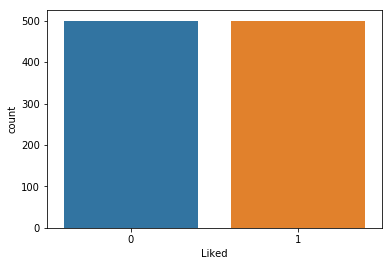

In [52]:
sns.countplot(df['Liked'])

Interesting, equal number of `"0"` and `"1"` ratings!

## Text Cleaning

In [53]:
#import cleaning library
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup 
from textblob import TextBlob

In [54]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    ps = PorterStemmer() 
    #stemming will take the root of the word
    #there are many stemmer available
    # 5. Remove stop words
    meaningful_words = [ps.stem(w) for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))  

In [10]:
print(df['Review'][3])

Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.


In [11]:
#lets check 1 review
clean_rev = review_to_words(df['Review'][3])

In [12]:
print(clean_rev)

stop late may bank holiday rick steve recommend love


In [13]:
num_reviews = df['Review'].size

In [15]:
# Initialize an empty list to hold the clean reviews
clean_reviews = []

# Loop over each review; 
#create an index i that goes from 0 to the length of the review list

for i in  range(0, num_reviews):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%250 == 0 ):
        print('Review %d of %d\n' % ( i+1, num_reviews ) )
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_reviews.append(review_to_words(df['Review'][i]))

Review 250 of 1000

Review 500 of 1000

Review 750 of 1000

Review 1000 of 1000



In [18]:
clean_reviews[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

# Vectorization (Bag of Words)

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
cv = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000)

In [72]:
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = cv.fit_transform(clean_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

In [73]:
train_data_features.shape

(1000, 1565)

In [74]:
# Take a look at the words in the vocabulary
vocab = cv.get_feature_names()
print(vocab)

['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'accordingli', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batter', 'bay', 'bbq', 

In [75]:
# Sum up the counts of each vocabulary word
vocab_sum = np.sum(train_data_features,axis=0)

In [76]:
# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, vocab_sum):
    print(tag, count)

absolut 9
absolutley 1
accid 1
accommod 1
accomod 1
accordingli 1
account 1
ach 1
acknowledg 2
across 1
actual 3
ad 2
afford 1
afternoon 1
ago 3
ahead 1
airlin 1
airport 1
ala 1
albondiga 1
allergi 1
almond 1
almost 2
alon 1
also 27
although 3
alway 15
amaz 24
ambianc 7
ambienc 3
amount 3
ampl 1
andddd 1
angri 1
annoy 1
anoth 10
anticip 1
anymor 1
anyon 2
anyth 2
anytim 5
anyway 3
apart 1
apolog 2
app 1
appal 1
appar 1
appeal 1
appet 3
appetit 1
appl 1
approv 1
area 7
arepa 1
aria 1
around 8
array 1
arriv 5
articl 1
ask 10
assur 2
ate 3
atmospher 11
atroci 1
attach 1
attack 2
attent 8
attitud 2
auju 1
authent 6
averag 4
avocado 1
avoid 6
aw 3
away 5
awesom 12
awkward 1
awkwardli 1
ayc 1
az 1
baba 1
babi 2
bachi 2
back 61
bacon 5
bad 18
bagel 2
bakeri 2
baklava 1
ball 1
bamboo 1
banana 1
bank 1
bar 9
bare 6
bargain 1
bartend 3
base 1
basebal 1
basic 2
batch 1
bathroom 5
batter 2
bay 4
bbq 1
bean 4
beat 4
beateou 1
beauti 5
becom 2
beef 5
beer 9
begin 1
behind 2
believ 3
bellagio 1
belli

solid 1
solidifi 1
somehow 1
someon 4
someth 4
somethat 1
somewhat 1
son 1
song 1
soon 9
soooo 2
sooooo 1
soooooo 1
sore 2
sorri 1
sound 1
soundtrack 1
soup 5
sour 1
southwest 1
space 1
spaghetti 1
special 8
speedi 1
spend 3
spice 2
spici 8
spicier 1
spinach 1
sport 1
spot 9
spotti 1
spring 1
sprout 1
staff 19
stale 3
standard 1
star 18
start 2
starv 1
station 2
stay 7
steak 18
steakhous 1
steiner 1
step 3
steve 1
stick 2
still 11
stink 1
stir 2
stomach 3
stood 1
stop 5
store 1
strang 1
stranger 1
strawberri 1
street 1
stretch 1
strike 1
string 1
strip 3
struck 1
struggl 1
stuf 2
stuff 2
stupid 1
style 3
styrofoam 1
sub 2
subpar 1
subway 3
succul 1
suck 9
sucker 1
suffer 1
sugar 1
sugari 2
suggest 2
summar 1
summari 1
summer 2
sun 1
sunday 1
sunglass 1
super 7
suppos 1
sure 8
surpris 2
sushi 13
sweet 5
swung 1
tabl 14
taco 6
tailor 1
take 8
takeout 1
talk 6
tap 2
tapa 2
tartar 2
tast 22
tasteless 5
tasti 11
tater 1
tea 4
teamwork 1
teeth 1
tell 6
temp 1
ten 2
tender 7
tepid 1
terribl 1

# Splitting the dataset into the Training set and Test set

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(train_data_features, df['Liked'], test_size = 0.20, random_state = 0)

# Naive Bayes 

In [79]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [80]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
nb_pred = nb.predict(X_test)

In [85]:
print(confusion_matrix(y_test, nb_pred))

[[72 25]
 [22 81]]


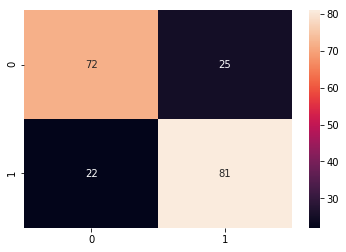

In [86]:
sns.heatmap(confusion_matrix(y_test,nb_pred),annot=True)

In [84]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        97
           1       0.76      0.79      0.78       103

   micro avg       0.77      0.77      0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



Not too bad, 153 correct predictions out of 200!

**Something more**

### part of speech tagging

In [29]:
string3 = "People live close when they work closely but they are closed enough"

In [44]:
import nltk
#nltk.download()
from nltk.tokenize import word_tokenize
nltk.pos_tag(word_tokenize(string3)) 
# part of speech tagging, see output below, words are verb, nouns etc.

[('People', 'NNS'),
 ('live', 'VBP'),
 ('close', 'RB'),
 ('when', 'WRB'),
 ('they', 'PRP'),
 ('work', 'VBP'),
 ('closely', 'RB'),
 ('but', 'CC'),
 ('they', 'PRP'),
 ('are', 'VBP'),
 ('closed', 'VBN'),
 ('enough', 'RB')]

### Sentiment analysis

In [56]:
df['Review_processed'] = df['Review'].apply(review_to_words)

In [57]:
df['Review_processed'].head()

0                                       wow love place
1                                           crust good
2                                   tasti textur nasti
3    stop late may bank holiday rick steve recommen...
4                              select menu great price
Name: Review_processed, dtype: object

In [58]:
def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

In [60]:
df['Review_sentiment'] = df['Review_processed'].apply(sentiment)

In [62]:
df['sentiment'] = ''
df['sentiment'][df['Review_sentiment'] > 0] = 'positive'
df['sentiment'][df['Review_sentiment'] < 0] = 'negative'
df['sentiment'][df['Review_sentiment'] == 0] = 'neutral'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Review Sentiments')

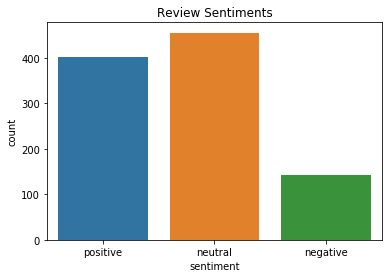

In [65]:
sns.countplot(df['sentiment'])
plt.title('Review Sentiments')

In [71]:
df_posr['Review_processed']  = pd.DataFrame(df['Review_processed'][ df['sentiment'] == 'positive'])
df_negr['Review_processed']  = pd.DataFrame(df['Review_processed'][ df['sentiment'] == 'negative'])
df_neutr['Review_processed'] = pd.DataFrame(df['Review_processed'][ df['sentiment'] == 'neutral'])

In [72]:
from wordcloud import WordCloud, STOPWORDS 

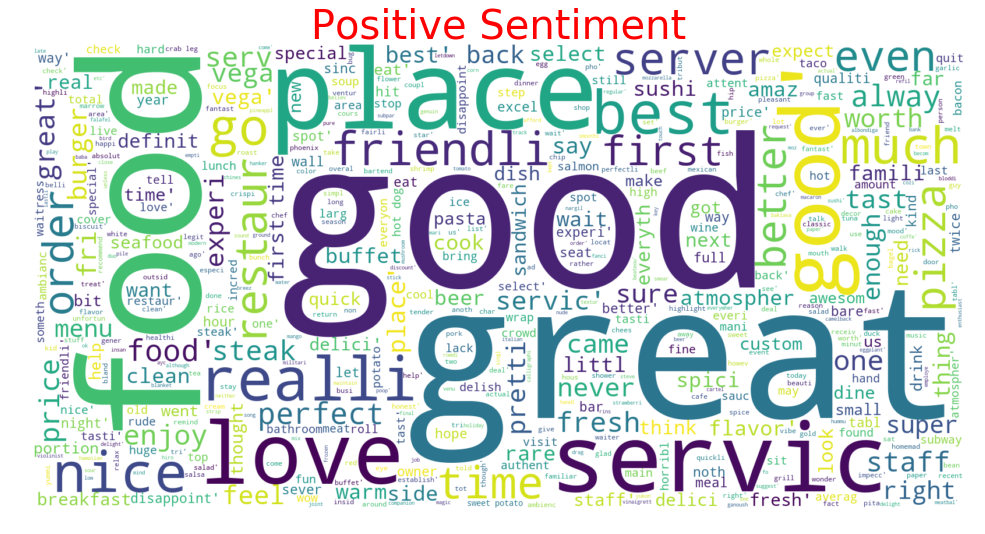

In [73]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(df_posr['Review_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Positive Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

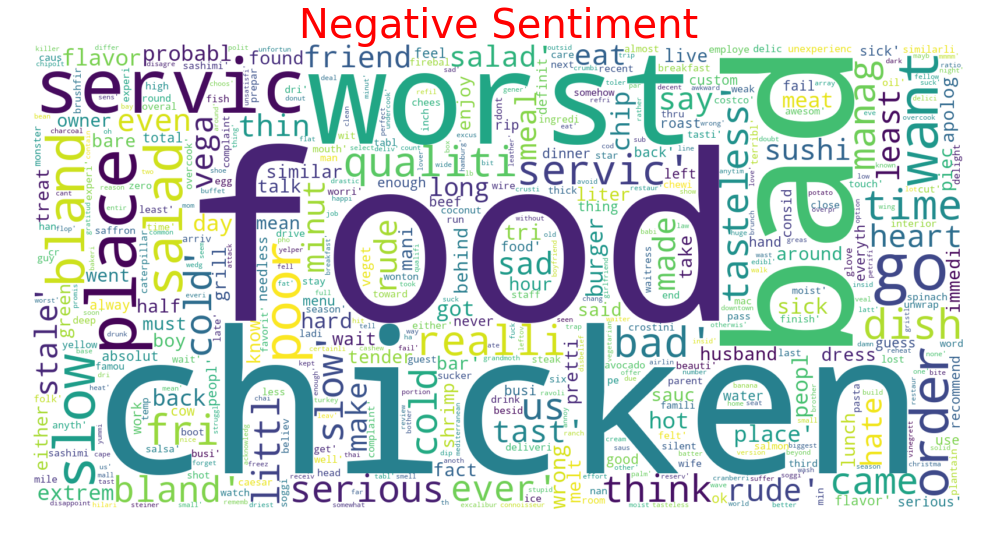

In [74]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(df_negr['Review_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Negative Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

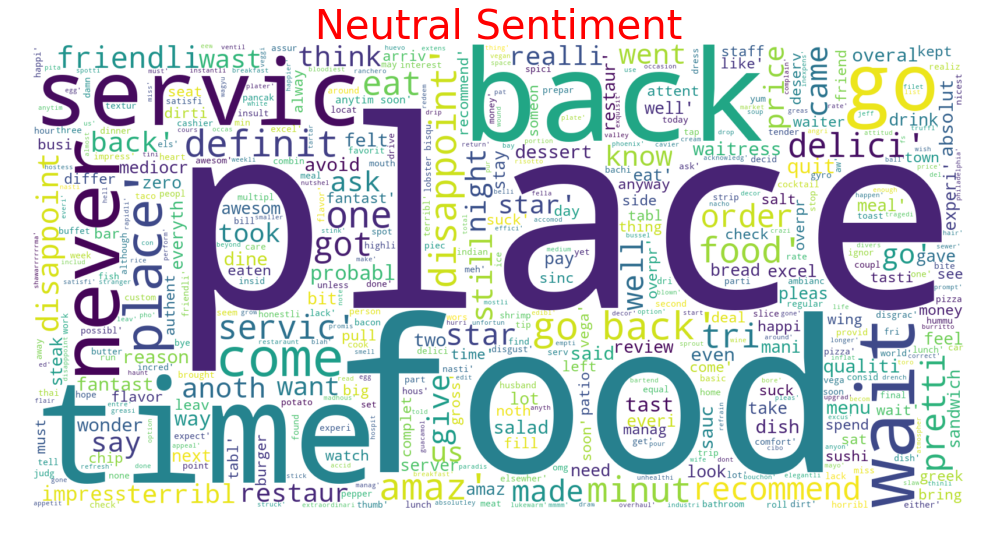

In [75]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(df_neutr['Review_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Neutral Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

# Topic Modeling

Topic Modelling is different from rule-based text mining approaches that use regular expressions or dictionary based keyword searching techniques. It is an unsupervised approach used for finding and observing the bunch of words (called “topics”) in large clusters of texts.

In [96]:
import string
from nltk.stem.wordnet import WordNetLemmatizer
import gensim 
from gensim import corpora

In [81]:
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [97]:
# clean text
lemma = WordNetLemmatizer()

def clean_text(doc):
    corpus = []
    for c in range(0, doc.shape[0]):
        stop_free = ' '.join([i for i in doc['Review'][c].lower().split() if i not in set(stopwords.words('english'))])
        puct_free = ''.join(i for i in stop_free if i not in set(string.punctuation))
        normalized = [lemma.lemmatize(word) for word in puct_free.split()]
        corpus.append(normalized)
    return corpus

doc_review = clean_text(df) 

In [106]:
# LDA model
dictionary = corpora.Dictionary(doc_review)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_review]
ldamodel = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics= 5, id2word= dictionary, passes=20)

In [110]:
#print(ldamodel.print_topics(num_topics=5,num_words=5))

for topic in ldamodel.show_topics(num_topics=5, formatted=False, num_words= 20):
    print('Topic {}: words'.format(topic[0]))
    topic_word = [w for (w,val) in topic[1]]
    print(topic_word)

Topic 0: words
['good', 'food', 'place', 'back', 'great', 'time', 'pretty', 'again', 'go', 'service', 'pizza', 'would', 'like', 'im', 'restaurant', 'soon', 'also', 'ive', 'eat', 'minute']
Topic 1: words
['place', 'great', 'food', 'best', 'would', 'much', 'it', 'steak', 'flavor', 'menu', 'way', 'amazing', 'made', 'overpriced', 'quality', 'really', 'think', 'sushi', 'fresh', 'go']
Topic 2: words
['time', 'food', 'like', 'first', 'delicious', 'great', 'server', 'staff', 'service', 'experience', 'nice', 'spicy', 'even', 'perfect', 'buffet', 'ever', 'slow', 'sauce', 'people', 'ambiance']
Topic 3: words
['here', 'really', 'like', 'burger', 'disappointed', 'good', 'ive', 'fry', 'got', 'salad', 'love', 'rude', 'tasted', 'also', 'potato', 'know', 'well', 'chip', 'chicken', 'flavor']
Topic 4: words
['service', 'food', 'back', 'place', 'go', 'one', 'friendly', 'star', 'restaurant', 'ever', 'fantastic', 'great', 'time', 'vega', 'minute', 'came', 'never', 'price', 'best', 'amazing']


In [112]:
# Top topics in document
tp = ldamodel.top_topics(doc_term_matrix,topn=20,dictionary=dictionary)

In [115]:
tp[0][0]

[(0.030768983, 'service'),
 (0.026054816, 'food'),
 (0.017576346, 'back'),
 (0.014435626, 'place'),
 (0.00981901, 'go'),
 (0.008561845, 'one'),
 (0.0076837996, 'friendly'),
 (0.0069692964, 'star'),
 (0.006937844, 'restaurant'),
 (0.0065017655, 'ever'),
 (0.0060916417, 'fantastic'),
 (0.0057320986, 'great'),
 (0.0057111904, 'time'),
 (0.005694422, 'vega'),
 (0.0055954796, 'minute'),
 (0.00542965, 'came'),
 (0.005216263, 'never'),
 (0.0047862316, 'price'),
 (0.0047464427, 'best'),
 (0.0046734978, 'amazing')]

In [119]:
tp[1][0]

[(0.04955254, 'good'),
 (0.019388022, 'food'),
 (0.01643516, 'place'),
 (0.015057776, 'back'),
 (0.011965281, 'great'),
 (0.010011562, 'time'),
 (0.009944788, 'pretty'),
 (0.009514313, 'again'),
 (0.0093599465, 'go'),
 (0.0076148785, 'service'),
 (0.0064888285, 'pizza'),
 (0.0064776116, 'would'),
 (0.006384574, 'like'),
 (0.005357937, 'im'),
 (0.0053461525, 'restaurant'),
 (0.0053219097, 'soon'),
 (0.005296161, 'also'),
 (0.0051576444, 'ive'),
 (0.0047533684, 'eat'),
 (0.004743983, 'minute')]

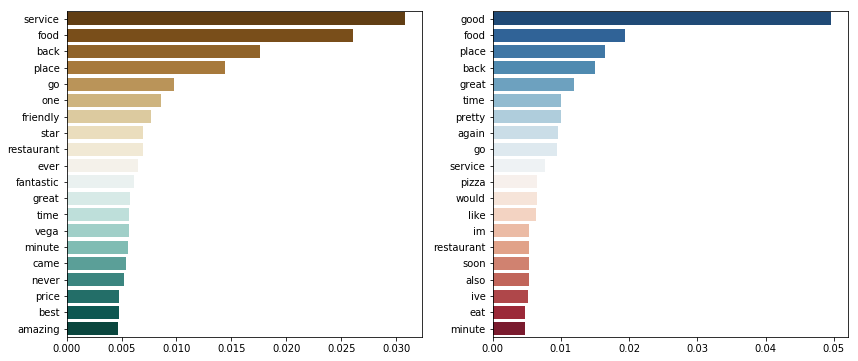

In [118]:
# tuple unpacking
label = [] 
value = []

f, ax = plt.subplots(1,2,figsize = (14,6))
#ax.set_title(tp[0])
ax1,ax2 = ax.flatten()
for i,k in tp[0][0]:
    label.append(i)
    value.append(k)
sns.barplot(label,value,palette='BrBG', ax=ax1)

label = [] 
value = []
for i,k in tp[1][0]:
    label.append(i)
    value.append(k)
sns.barplot(label,value,palette='RdBu_r', ax= ax2);